In [1]:
import numpy as np

from display import *
from grid import *
from path_finder import *

In [2]:
def kells1(prongs_top=True):
    # border
    yield simple_wall(np.array([0.5,0.5]), (1,0), 7)
    yield simple_wall(np.array([0.5,0.5]), (0,1), 7)
    yield simple_wall(np.array([7.5,0.5]), (0,1), 7)
    yield simple_wall(np.array([0.5,7.5]), (1,0), 7)

    # top right
    yield simple_wall(np.array([7.5,0.5]), (-1,1), 3)
    yield simple_wall(np.array([3,2]), (1,1), 3)
    if prongs_top:
        yield simple_wall(np.array([6,4]), (-1,1), 0.5)
        yield simple_wall(np.array([4,2]), (-1,1), 0.5)

    # bottom left
    yield simple_wall(np.array([0.5,7.5]), (1,-1), 3)
    yield simple_wall(np.array([2,3]), (1,1), 3)

    if not prongs_top:
        yield simple_wall(np.array([4.5,5.5]), (-1,1), 0.5)
        yield simple_wall(np.array([2.5,3.5]), (-1,1), 0.5)


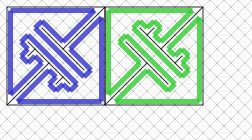

In [3]:
cols = 18
rows = 10
size = 14
display = Display(cols * size, rows * size)

test_pat = np.concatenate([
    np.array(list(kells1(False))),
    np.array(list(kells1(True))) + np.array([7, 0, 7, 0])
]) * size

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    width = 5
    context.set_line_width(width)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)
    pf = PathFind(np.array([0.75,0.75]) * size, (1,0), test_pat, size)
    for i in range(20):
        draw_simple_lines(context, list(pf.step()))

    context.set_line_width(width)
    context.set_source_rgba(0.2, 0.8, 0.2, 0.8)
    pf = PathFind(np.array([7.75,0.75]) * size, (1,0), test_pat, size)
    for i in range(20):
        draw_simple_lines(context, list(pf.step()))
    
display.show()